### 150103P K.G.G.L.A de Silva BME

# EN4553 Assignment 2

This jupyter notebook provides the codes and results obtained for the questions asked in the assignment 2. First, we import some python modules that would be required for tasks. 

In [57]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pickle
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cvxopt
cvxopt.solvers.options['show_progress'] = False
from cvxopt import matrix, solvers

### Question 1 : SVM on the IRIS Dataset 

In this question, we directly use a python example given in the sklearn documnetation. First, we write functions to help us visualize the decision boundaries of the classifier and the data we are dealing with. 

In [58]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Next we can run the code the below to train a SVM for the IRIS dataset.

X shape =  (150, 2)
y shape =  (150,)


/Users/ashwin/anaconda/envs/myo/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/ashwin/anaconda/envs/myo/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


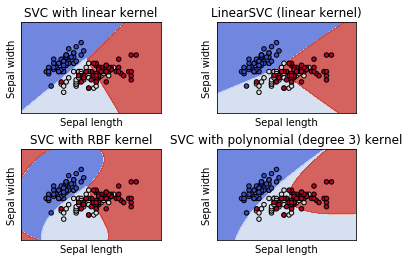

In [59]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# shapes of the dataset
print('X shape = ', X.shape)
print('y shape = ', y.shape)

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


In the next part of the question 1, we perform a grid search to optimize our hyperparameters. The radial bias function (rbf) is used as the kernel of the SVM while the hyperparameters $C$ and $\gamma$ are optimized using a grid search. For $C = \{ 1, 10, 100, 1000 \}$ and $\gamma = \{ 0.1, 0.01, 0.001, 0.0001 \}$ were tested in the grid search.

First, we split the original dataset in to a train split (60 %) , a validation split (20 %) and a test split (20 %). $4 \times 4 = 16$ models would be trained on the train set for each parameter combination and would be evaluated on the test set. The accuracy scores for each model would be computed and the optimum parameter combination would be that of the model which yields the highest test set accuracy score.

In [60]:
# Split the dataset to train, val, test splits ( 60 % train, 20 % val, 20 % test )
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=0)

Then we set the parameters for the grid search.

In [61]:
# Set the parameters for grid search
gs_params = {
    'kernel': 'rbf',
    'gamma': [1e-1, 1e-2, 1e-3, 1e-4],
    'C': [1, 10, 100, 1000]
}


We can now perform the grid search to find the optimum parameters.

train accuracy : 85.71 % , test accuracy 73.68 % for { C = 1, gamma = 0.1000 } 
train accuracy : 68.75 % , test accuracy 55.26 % for { C = 1, gamma = 0.0100 } 
train accuracy : 36.61 % , test accuracy 23.68 % for { C = 1, gamma = 0.0010 } 
train accuracy : 36.61 % , test accuracy 23.68 % for { C = 1, gamma = 0.0001 } 
train accuracy : 83.93 % , test accuracy 76.32 % for { C = 10, gamma = 0.1000 } 
train accuracy : 85.71 % , test accuracy 73.68 % for { C = 10, gamma = 0.0100 } 
train accuracy : 68.75 % , test accuracy 55.26 % for { C = 10, gamma = 0.0010 } 
train accuracy : 36.61 % , test accuracy 23.68 % for { C = 10, gamma = 0.0001 } 
train accuracy : 83.04 % , test accuracy 76.32 % for { C = 100, gamma = 0.1000 } 
train accuracy : 83.04 % , test accuracy 76.32 % for { C = 100, gamma = 0.0100 } 
train accuracy : 85.71 % , test accuracy 73.68 % for { C = 100, gamma = 0.0010 } 
train accuracy : 68.75 % , test accuracy 55.26 % for { C = 100, gamma = 0.0001 } 
train accuracy : 83.93 % , t

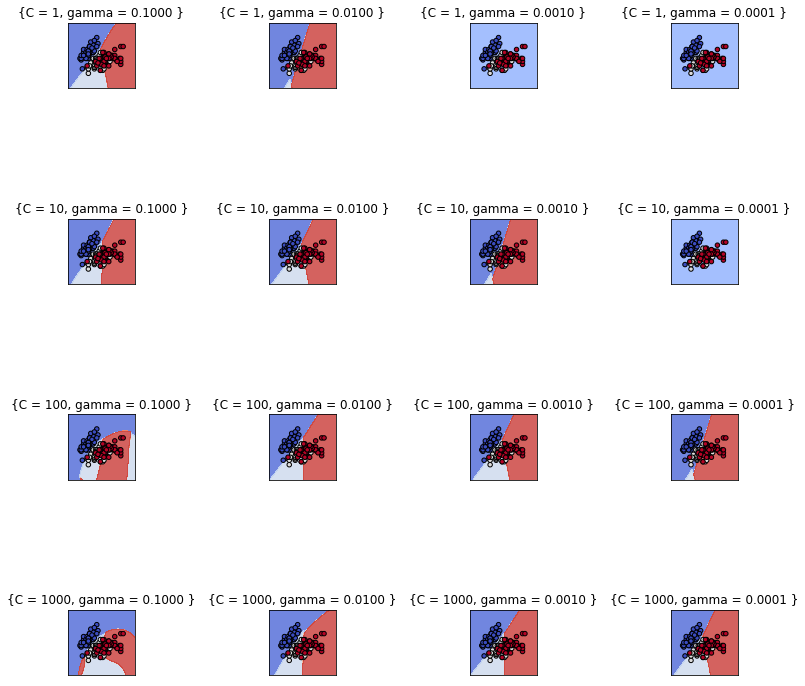

Optimum Paramter Combination =  {'C': 10, 'gamma': 0.1}


In [62]:
# create a 4 x 4 grid
fig, sub = plt.subplots(4, 4, figsize=(12,12))
axes = sub.flatten()
plt.subplots_adjust(wspace=2, hspace=2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

# perform the grid search
idx = 0
acc_log = []
param_log = {}
for C in gs_params['C']:
    for gamma in gs_params['gamma']:
        clf = svm.SVC(kernel=gs_params['kernel'], C=C, gamma=gamma)
        clf.fit(X_train, y_train)
        train_acc = accuracy_score(y_train, clf.predict(X_train))
        test_acc = accuracy_score(y_val, clf.predict(X_val))
        acc_log.append(test_acc)
        param_log[idx] = {'C': C, 'gamma' : gamma}
        print("train accuracy : %0.2f %% , test accuracy %0.02f %% for { C = %d, gamma = %0.4f } " % (train_acc*100, test_acc*100, C, gamma))
        ax = axes[idx]
        idx += 1
        plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
#         ax.set_xlabel('Sepal length')
#         ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title('{C = %d, gamma = %0.4f }' % (C, gamma))

plt.show()

best_params =  param_log[np.argmax(acc_log)]
print("Optimum Paramter Combination = ", best_params)

Now we can train the (train + val) dataset on a model with the optimum $C$ and $\gamma$, to obtain a more robust, hyperparameter tuned classifier. Finally we can evaluate the classifier on the test set we left our earlier.

hyperparameter-tuned model train accuracy : 77.66 % , test accuracy 73.33 %


[]

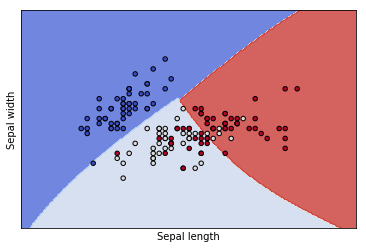

In [64]:
clf = svm.SVC(kernel=gs_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])

X_train = np.append(X_train, X_val, axis=0)
y_train = np.append(y_train, y_val, axis=0)

clf.fit(X_train, y_train)

train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, clf.predict(X_test))

print("hyperparameter-tuned model train accuracy : %0.2f %% , test accuracy %0.02f %%" % (train_acc*100, test_acc*100))

ax = plt.axes()
plot_contours(ax, clf, xx, yy,cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())


### Question 2 :  SVM + BoVW  for CIFAR-10 dataset

The following steps were followed to tackle this question.

1. Created the training dataset so that each class had 100 images. Therefore, the total number of images in the training dataset was 1000. Similarly the test dataset was created so that each class had 50 images. Therefore, the test dataset contained a total of 500 images.
2. All the training images were converted in to grayscale and the SIFT descriptor features were extracted and pooled together.
3. Using a vocabulary size of 50, the SIFT features were clustered using k-means clustering. 
4. For each training image, the descriptors were re-extracted and a histogram was created using the dictionary formulated in the 3rd step.
5. These histograms were then normalized and was used to train the SVM (kernel = rbf, C = 1)
6. To classify a new image, first the SIFT features should be extracted from it. Then a histogram should be created using the visual dictionary in step 3. The histogram is then normalized according to the training dataset and fed in to the SVM to get the label of the new image.

First, we define some useful functions for file handling purposes.


In [65]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


def get_data_from_file(file):
    dict = unpickle("/Users/ashwin/Semester 7/Machine Vision/Assignments/Assignment_2/datasets/cifar-10-batches-py/"+file)
    print("Unpacking {}".format(dict[b'batch_label']))
    X = np.asarray(dict[b'data'].T).astype("uint8")
    Yraw = np.asarray(dict[b'labels'])
    Y = np.zeros((10,10000))
    for i in range(10000):
        Y[Yraw[i],i] = 1
    names = np.asarray(dict[b'filenames'])
    return X,Y,names


def get_data():
    x_train = np.empty((3072,0)).astype("uint8")
    y_train = np.empty((10,0))
    n_train = np.empty(0)
    for b in range(1,6):
        fn = 'data_batch_' + str(b)
        X, Y, names = get_data_from_file(fn)
        x_train= np.append(x_train, X, axis=1)
        y_train= np.append(y_train, Y, axis=1)
        n_train= np.append(n_train, names)
    del X, Y
    fn = 'test_batch'
    x_test, y_test, n_test = get_data_from_file(fn)
    return x_train, y_train, n_train, x_test, y_test, n_test


def get_label_names(file):
    dict = unpickle("/Users/ashwin/Semester 7/Machine Vision/Assignments/Assignment_2/datasets/cifar-10-batches-py/"+file)
    L = np.asarray(dict[b'label_names'])
    return L


def visualize_image(X, Y, names, label_names, id):
    rgb = X[:,id]
    #print(rgb.shape)
    img = rgb.reshape(3,32,32).transpose([1, 2, 0]) #print(img.shape)
    plt.imshow(img)
    plt.title("%s%s%s" % (names[id], ', Class = ', label_names[np.where(Y[:,id]==1.0)]) )
    plt.show()
    #dir = os.path.abspath("output/samples")
    # #plt.savefig(dir+"/"+names[id].decode('ascii'))

Next we define some helper funcctions needed for the Bag of Visual Words (BoVW).

In [66]:
def compute_sift(im, sift):
    im = im.reshape(3, 32, 32).transpose([1, 2, 0])
    im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(im, None)
    return des

def get_hist(des, kmeans, no_clusters, flag):
    pred = kmeans.predict(des)
    hist, bin = np.histogram(pred, bins=range(no_clusters+1))
    if flag:
        plt.bar(bin, hist, align='center', alpha=0.5)
        plt.show()
    return hist.reshape((1, no_clusters))


def build_descriptor_list(X, sift):
    descriptor_list = np.empty((0, 128))
    for i in range(np.size(X, 0)):
        im = X[i, :]
        des = compute_sift(im, sift)
        if des is None:
            continue
        descriptor_list = np.append(descriptor_list, des, axis=0)
    return descriptor_list


def build_histogram(X, no_clusters, kmeans):
    histograms = np.empty((0, no_clusters))
    for i in range(np.size(X, 0)):
        im = X[i, :]
        des = compute_sift(im, sift)
        if des is not None:
            histograms = np.append(histograms, get_hist(des, kmeans, no_clusters, False), axis=0)
        else:
            histograms = np.append(histograms, np.zeros((1, no_clusters)), axis=0)
    return histograms

Now we can implement the BoVW + SVM classifier. We start by importing the entire CIFAR-10 dataset.

Unpacking b'training batch 1 of 5'
Unpacking b'training batch 2 of 5'
Unpacking b'training batch 3 of 5'
Unpacking b'training batch 4 of 5'
Unpacking b'training batch 5 of 5'
Unpacking b'testing batch 1 of 1'
x_train.shape =  (3072, 50000)
y_train.shape =  (10, 50000)
n_train.shape =  (50000,)
x_test.shape =  (3072, 10000)


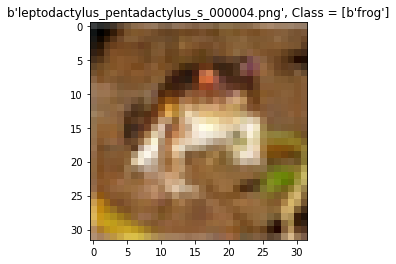

In [67]:
L = get_label_names('batches.meta')
x_train, y_train, n_train, x_test, y_test, n_test = get_data()
print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('n_train.shape = ', n_train.shape)
print('x_test.shape = ', x_test.shape)

visualize_image(x_train, y_train, n_train, L, 0)


Then we select 1000 images for training and 500 images for testing (equal number of images for each class). This is beacause the SVM takes a long time to train when there number of training samples is very large.

In [68]:
# select 1000 images for training and 500 images for testing (equal number of images for each class)
labels = np.zeros((np.size(x_train, 1),))
for i in range(np.size(x_train, 1)):
    labels[i] = int(np.where(y_train[:, i]==1)[0])

X = np.empty((3072, 0)).astype("uint8")
Y = np.empty((0, ))
X_test = np.empty((3072, 0)).astype("uint8")
Y_test = np.empty((0, ))
for i in range(10):
    idx = np.where(labels == i)[0]
    X = np.append(X, x_train[:, idx[:100]], axis=1)
    Y = np.append(Y, labels[idx[:100]])
    X_test = np.append(X_test, x_train[:, idx[100:150]], axis=1)
    Y_test = np.append(Y_test, labels[idx[100:150]])

X = X.T
X_test = X_test.T

print('X.shape = ', X.shape)
print('Y.shape = ', Y.shape)
print('X_test.shape = ', X_test.shape)
print('Y_test.shape = ', Y_test.shape)


X.shape =  (1000, 3072)
Y.shape =  (1000,)
X_test.shape =  (500, 3072)
Y_test.shape =  (500,)


After the dataset split, we can create the descripor list.

In [69]:
# build descriptor list
sift = cv.xfeatures2d.SIFT_create()
descriptor_list = build_descriptor_list(X, sift)

print('discriptor-list shape = ', descriptor_list.shape)

discriptor-list shape =  (13017, 128)


Then we can make the vocabulary using k-means clustering.

In [70]:
# making the vocabulary
no_clusters = 50 # vocabulary size
kmeans = KMeans(n_clusters=no_clusters)
kmeans.fit(descriptor_list)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

With that, we can now build the hisograms for the training images.

In [71]:
# build the histograms
histograms = build_histogram(X, no_clusters, kmeans)
histograms_test = build_histogram(X_test, no_clusters, kmeans)
print('histograms shape = ', histograms.shape)
print('histograms_test shape = ', histograms_test.shape)

histograms shape =  (1000, 50)
histograms_test shape =  (500, 50)


Now we can proceed to creating the SVM model.

In [73]:
# standardize the data
sc = preprocessing.StandardScaler()
histograms = sc.fit_transform(histograms)
histograms_test = sc.transform(histograms_test)

# svm
# clf = svm.LinearSVC(C=10) # (kernel = linear, C = 10)
clf = svm.SVC(C=1, gamma=0.1) #  (kernel = rbf, C = 1)
clf.fit(histograms, Y)

# predict
Y_pred = clf.predict(histograms)
Y_test_pred = clf.predict(histograms_test)

# accuracies
print("Training Accuracy = %0.2f %%" % (accuracy_score(Y, Y_pred)*100))
print("Testing Accuracy = %0.2f %%" % (accuracy_score(Y_test, Y_test_pred)*100))

print('Done.')

Training Accuracy = 99.10 %
Testing Accuracy = 17.20 %
Done.


### Question 3 : Hand-coded SVM using cvxopt.qp for IRIS dataset

A class by the name our_SVM was written to tackle this problem. The core of the class is the binary support vector machine. Since the problem at hand is a multi-class classfication, a one-vs-rest approach was implemented. In this method, you train 10 separate classifiers for each class against the rest of the classes. When predicting, the feature vector is passed through all these 10 classifiers to obtain the $(W.x + b)$  score. The class whose one-vs-rest classifier yielded the highest score was chosen as the label of the feature vector. This was implemented from the following code snippet.

First we define the kernels. 

In [74]:
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, argv):
    gamma, p = argv
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, argv):
    gamma, p = argv
    return np.exp(-gamma*np.linalg.norm(x-y)**2)

Then we can code the our_SVM class.

In [75]:
class our_SVM(object):

    def __init__(self, kernel=linear_kernel, C=1, p=3, gamma=0.1):
        self.kernel = kernel
        self.C = C
        self.args = (gamma, p)
        self.clf = {}

    def binary_svm(self, X, y):

        N = X.shape[0]
        q = matrix(-np.ones((N, 1)), tc='d')
        K = np.zeros((N, N))
        for i in range(N):
            for j in range(N):
                K[i, j] = self.kernel(X[i], X[j], self.args)
        P = matrix(np.outer(y, y) * K, tc='d')
        g1 = np.asarray(np.diag(np.ones(N) * -1))
        g2 = np.asarray(np.diag(np.ones(N)))
        G = matrix(np.append(g1, g2, axis=0), tc='d')
        h = matrix(np.append(np.zeros(N), (np.ones(N) * self.C), axis =0), tc='d')
        A = matrix(y.reshape(1, N), tc='d')
        b = matrix(np.zeros((1, 1)), tc='d')

        sol = solvers.qp(P, q, G, h, A, b)

        alpha = np.ravel(sol['x'])
        idx = alpha > 0
        ind = np.arange(len(alpha))[idx]
        alpha = alpha[idx]
        sv = X[idx]
        sv_y = y[idx]

        b = 0
        for i in range(len(alpha)):
            b += sv_y[i]
            b -= np.sum(alpha * sv_y * K[ind[i], idx])
        b /= len(alpha)

        clf = {}
        clf['alpha'] = alpha
        clf['sv'] = sv
        clf['sv_y'] = sv_y
        clf['b'] = b

        return clf

    def compute_score(self, X, clf):
        alpha = clf['alpha']
        sv = clf['sv']
        sv_y = clf['sv_y']
        b = clf['b']

        if self.kernel == linear_kernel:
            w = np.zeros(len(X))
            for n in range(len(alpha)):
                w += alpha[n]*sv_y[n]*sv[n]
            score = np.dot(X, w) + b
        else:
            score = 0
            for a_i, sv_y_i, sv_i in zip(alpha, sv_y, sv):
                score += a_i * sv_y_i * self.kernel(X, sv_i, self.args)
            score += b

        return score

    def fit(self, X, y):
        no_classes = len(np.unique(y))
        clf = {}
        for i in range(no_classes):
            yn = np.copy(y)
            yn[yn != i] = -1
            yn[yn == i] = 1
            self.clf['c%s' % (str(i))] = self.binary_svm(X, yn)


    def predict(self, X):
        no_classes = len(self.clf)
        pred = []
        for i in range(X.shape[0]):
            scores = []
            for j in range(no_classes):
                scores.append(self.compute_score(X[i, :], self.clf['c%s' % (str(j))]))
            pred.append(np.argmax(scores))
        return np.array(pred)

With that we can now implement out hand-coded linear SVM.

In [77]:
# import some data to play with
iris = datasets.load_iris()

# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Split the dataset to train and test splits ( 70 % train and 30 % test )
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

clf1 = our_SVM(kernel=gaussian_kernel, C=100, gamma=0.1)
clf1.fit(X_train, y_train)
pred1_train = clf1.predict(X_train)
pred1_test = clf1.predict(X_test)

clf2 = svm.SVC(C=100, gamma=0.1)
clf2.fit(X_train, y_train)
pred2_train = clf2.predict(X_train)
pred2_test = clf2.predict(X_test)

print("Training Accuracy from hand-coded SVM : ", accuracy_score(y_train, pred1_train))
print("Testing Accuracy hand-coded SVM : ", accuracy_score(y_test, pred1_test))
print("Training Accuracy sklearn SVM : ", accuracy_score(y_train, pred2_train))
print("Testing Accuracy sklearn SVM : ", accuracy_score(y_test, pred2_test))


Training Accuracy from hand-coded SVM :  0.8285714285714286
Testing Accuracy hand-coded SVM :  0.8
Training Accuracy sklearn SVM :  0.8285714285714286
Testing Accuracy sklearn SVM :  0.8222222222222222


We can perform the grid search as well

In [78]:
# Split the dataset to train, val, test splits ( 60 % train, 20 % val, 20 % test )
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=0)

# perform the grid search
idx = 0
acc_log = []
param_log = {}
for C in gs_params['C']:
    for gamma in gs_params['gamma']:
        clf = our_SVM(kernel=gaussian_kernel, C=C, gamma=gamma)
        clf.fit(X_train, y_train)
        train_acc = accuracy_score(y_train, clf.predict(X_train))
        test_acc = accuracy_score(y_val, clf.predict(X_val))
        acc_log.append(test_acc)
        param_log[idx] = {'C': C, 'gamma' : gamma}
        idx += 1
        print("train accuracy : %0.2f %% , test accuracy %0.02f %% for { C = %d, gamma = %0.4f } " % (train_acc*100, test_acc*100, C, gamma))

best_params =  param_log[np.argmax(acc_log)]
print("Optimum Paramter Combination = ", best_params)

train accuracy : 81.25 % , test accuracy 63.16 % for { C = 1, gamma = 0.1000 } 
train accuracy : 72.32 % , test accuracy 55.26 % for { C = 1, gamma = 0.0100 } 
train accuracy : 66.96 % , test accuracy 55.26 % for { C = 1, gamma = 0.0010 } 
train accuracy : 36.61 % , test accuracy 23.68 % for { C = 1, gamma = 0.0001 } 
train accuracy : 83.93 % , test accuracy 73.68 % for { C = 10, gamma = 0.1000 } 
train accuracy : 77.68 % , test accuracy 60.53 % for { C = 10, gamma = 0.0100 } 
train accuracy : 72.32 % , test accuracy 55.26 % for { C = 10, gamma = 0.0010 } 
train accuracy : 66.96 % , test accuracy 55.26 % for { C = 10, gamma = 0.0001 } 
train accuracy : 83.93 % , test accuracy 76.32 % for { C = 100, gamma = 0.1000 } 
train accuracy : 83.04 % , test accuracy 71.05 % for { C = 100, gamma = 0.0100 } 
train accuracy : 76.79 % , test accuracy 60.53 % for { C = 100, gamma = 0.0010 } 
train accuracy : 72.32 % , test accuracy 55.26 % for { C = 100, gamma = 0.0001 } 
train accuracy : 83.04 % , t

In [79]:
clf = our_SVM(kernel=gaussian_kernel, C=best_params['C'], gamma=best_params['gamma'])

X_train = np.append(X_train, X_val, axis=0)
y_train = np.append(y_train, y_val, axis=0)

clf.fit(X_train, y_train)

train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, clf.predict(X_test))

print("hyperparameter-tuned model train accuracy : %0.2f %% , test accuracy %0.02f %%" % (train_acc*100, test_acc*100))

hyperparameter-tuned model train accuracy : 80.00 % , test accuracy 73.33 %


### Question 4 : Hand-coded SVM + BoVW for CIFAR-10 Dataset



Unpacking b'training batch 1 of 5'
Unpacking b'training batch 2 of 5'
Unpacking b'training batch 3 of 5'
Unpacking b'training batch 4 of 5'
Unpacking b'training batch 5 of 5'
Unpacking b'testing batch 1 of 1'
x_train.shape =  (3072, 50000)
y_train.shape =  (10, 50000)
n_train.shape =  (50000,)
x_test.shape =  (3072, 10000)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


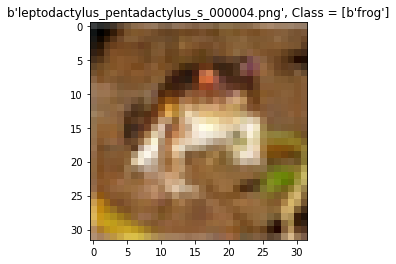

X.shape =  (1000, 3072)
Y.shape =  (1000,)
X_test.shape =  (500, 3072)
Y_test.shape =  (500,)
discriptor-list shape =  (13017, 128)
histograms shape =  (1000, 100)
histograms_test shape =  (500, 100)
Training Accuracy = 99.90 %
Testing Accuracy = 14.00 %
Done.


In [80]:
L = get_label_names('batches.meta')
x_train, y_train, n_train, x_test, y_test, n_test = get_data()
print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('n_train.shape = ', n_train.shape)
print('x_test.shape = ', x_test.shape)
print(y_train[:, 0])

visualize_image(x_train, y_train, n_train, L, 0)

# select 1000 images for training and 500 images for testing (equal number of images for each class)
labels = np.zeros((np.size(x_train, 1),))
for i in range(np.size(x_train, 1)):
    labels[i] = int(np.where(y_train[:, i]==1)[0])

X = np.empty((3072, 0)).astype("uint8")
Y = np.empty((0, ))
X_test = np.empty((3072, 0)).astype("uint8")
Y_test = np.empty((0, ))
for i in range(10):
    idx = np.where(labels == i)[0]
    X = np.append(X, x_train[:, idx[:100]], axis=1)
    Y = np.append(Y, labels[idx[:100]])
    X_test = np.append(X_test, x_train[:, idx[100:150]], axis=1)
    Y_test = np.append(Y_test, labels[idx[100:150]])

X = X.T
X_test = X_test.T

print('X.shape = ', X.shape)
print('Y.shape = ', Y.shape)
print('X_test.shape = ', X_test.shape)
print('Y_test.shape = ', Y_test.shape)


# build descriptor list
sift = cv.xfeatures2d.SIFT_create()
descriptor_list = build_descriptor_list(X, sift)

print('discriptor-list shape = ', descriptor_list.shape)

# making the vocabulary
no_clusters = 100
kmeans = KMeans(n_clusters=no_clusters)
kmeans.fit(descriptor_list)

# build the histograms
histograms = build_histogram(X, no_clusters, kmeans)
histograms_test = build_histogram(X_test, no_clusters, kmeans)
print('histograms shape = ', histograms.shape)
print('histograms_test shape = ', histograms_test.shape)

# standardize the data
sc = preprocessing.StandardScaler()
histograms = sc.fit_transform(histograms)
histograms_test = sc.transform(histograms_test)

# svm
clf = our_SVM(kernel=gaussian_kernel, C=1, gamma=0.1)
clf.fit(histograms, Y)

# predict
pred_train = clf.predict(histograms)
pred_test = clf.predict(histograms_test)

# accuracies
print("Training Accuracy = %0.2f %%" % (accuracy_score(Y, pred_train)*100))
print("Testing Accuracy = %0.2f %%" % (accuracy_score(Y_test, pred_test)*100))

print('Done.')

### Question 5 : Keras based NN for CIFAR-10 Dataset

The codes for this question can be found in the following Google Colaboratory Notebook.
https://colab.research.google.com/drive/1_4Txi8WIljtDIsqivBgsqZDvvNaHeyD6

### Question 6 : Hand-coded NN for CIFAR-10 Dataset

Our objective in this quesiton is to create a shallow neural network with a input layer, a hidden layer (relu activation) and an output layer (softmax). First, we start by defining relu function, derivative of the relu function and softmax function. In addition we also define the sigmoid function and its derivative so that we can compare how neural network with differentlt activated hidden layers perform.

In [70]:
def softmax(z):
   # exps = np.exp(z - z.max())
    return np.exp(z) / sum(np.exp(z))

def relu(z):
    return np.maximum(0,z)

def relu_grad(z):
    z[z <= 0] = 0
    z[z > 0] = 1
    return z

def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def sigmoid_grad(z):
    return z*(1-z)

It is important to get the sizes of the layers prior to building the network. This is performed by the following function.

In [71]:
def layer_sizes(X, Y, n_h):
    n_x = X.shape[0] # size of input layer
    n_y = Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

Before we start training the Neural Network, we have to initialize the trainable parameters. This is done by the following function.

In [72]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(0)

    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

Next, we define the forward propagation block. This includes the architecture of the Neural Network.

In [73]:
def forward_propagation(X, parameters):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

The following function computes the cost between the network output and the target. Cross entropy loss function is used for this network.

In [75]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1] # number of example
    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2),Y) + np.multiply((1-Y),np.log(1-A2))
    cost = -(1/m)*np.sum(logprobs)
    cost = np.squeeze(cost)
    return cost

Next, we define the backward propagation block. This primarlity distributes the error between the target and the output across the network from end to start to compute the gradients of the loss function with respect to the paramters. 

In [76]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]

    W1 = parameters['W1']
    W2 = parameters['W2']

    A1 = cache['A1']
    A2 = cache['A2']
    Z1 = cache['Z1']

    dZ2 = (A2 - Y) #*sigmoid_grad(A2)
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2)*relu_grad(A1)
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

After the gradients are computed in the backpropagation, the parameters needs to be updated. This is performed by the following function.

In [77]:
def update_parameters(parameters, grads, learning_rate = 1):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

Next, we can combine the aforementioned functions to create out neural network model. Mini-batching is incorporated with the training process. 

In [80]:
def nn_model_mini_batching(X, Y, n_h, lr, batch_size=32, epochs=1000):
    np.random.seed(0)

    (n_x, n_h, n_y) = layer_sizes(X, Y, n_h)

    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    m = X.shape[1]
    num_batches = int(np.floor(m/batch_size))

    # shuffle the training data
    idx = np.arange(m)
    np.random.shuffle(idx)
    x_train = X[:, idx]
    y_train = Y[:, idx]

    for i in range(epochs):
        for j in range(num_batches+1):

            if j == num_batches :
                x_batch = x_train[:, j*batch_size:m]
                y_batch = y_train[:, j*batch_size:m]

            else:
                x_batch = x_train[:, j*batch_size:(j+1)*batch_size]
                y_batch = y_train[:, j*batch_size:(j+1)*batch_size]

            A2, cache = forward_propagation(x_batch, parameters)
            cost = compute_cost(A2, y_batch, parameters)
            grads = backward_propagation(parameters, cache, x_batch, y_batch)
            parameters = update_parameters(parameters, grads, learning_rate=lr)
        
        if i % 100 == 0: 
            print("Cost after epoch %i: %f" % (i, cost))

    return parameters

We aslo define a function to predict the label of the data.

In [81]:
def predict(parameters, X):

    A2, cache = forward_propagation(X, parameters)
    # predictions = (A2 > 0.5)
    predictions = np.argmax(A2, axis=0)

    return predictions

Now we can implement the neural network on the CIFAR-10 dataset. First, we select 5000 images as the train set and 1000 images as the test set. All the classes are eqaully balanced in both train and test sets.

In [88]:
L = get_label_names('batches.meta')
x_train, y_train, n_train, x_test, y_test, n_test = get_data()

# select the dataset
labels = np.zeros((np.size(x_train, 1),))
for i in range(np.size(x_train, 1)):
    labels[i] = int(np.where(y_train[:, i]==1)[0])

X = np.empty((3072, 0)).astype("uint8")
y = np.empty((10, 0))
l = np.empty((0, ))
X_test = np.empty((3072, 0)).astype("uint8")
y_test = np.empty((10, 0))
l_test = np.empty((0, ))
for i in range(10):
    idx = np.where(labels == i)[0]
    X = np.append(X, x_train[:, idx[:100]], axis=1)
    y = np.append(y, y_train[:, idx[:100]], axis=1)
    l = np.append(l, labels[idx[:100]])
    X_test = np.append(X_test, x_train[:, idx[100:150]], axis=1)
    y_test = np.append(y_test, y_train[:, idx[100:150]], axis=1)
    l_test = np.append(l_test, labels[idx[100:150]])
    
print('X.shape = ', X.shape)
print('Y.shape = ', y.shape)
print('X_test.shape = ', X_test.shape)
print('Y_test.shape = ', y_test.shape)


Unpacking b'training batch 1 of 5'
Unpacking b'training batch 2 of 5'
Unpacking b'training batch 3 of 5'
Unpacking b'training batch 4 of 5'
Unpacking b'training batch 5 of 5'
Unpacking b'testing batch 1 of 1'
X.shape =  (3072, 1000)
Y.shape =  (10, 1000)
X_test.shape =  (3072, 500)
Y_test.shape =  (10, 500)


Then we have to standardize the data.

In [89]:
# standardize
X = X.astype('float32')
X_test = X_test.astype('float32')
X /= 255
X_test /= 255

Now we can train the model.

In [90]:
n_h = 512 # size of the hidden layer
parameters = nn_model_mini_batching(X, y, n_h, lr=0.001, batch_size=32, epochs=1000)

Cost after epoch 0: 3.235080
Cost after epoch 100: 2.770174
Cost after epoch 200: 2.471269
Cost after epoch 300: 2.146439
Cost after epoch 400: 1.833816
Cost after epoch 500: 1.546860
Cost after epoch 600: 1.273864
Cost after epoch 700: 1.021816
Cost after epoch 800: 0.808679
Cost after epoch 900: 0.644155


Next, we can make the predictions using the trained network and compute the accuracies.

In [91]:
# predict
pred = predict(parameters, X)
pred_test = predict(parameters, X_test)

print('Training Accuracy : %0.2f %%' % (accuracy_score(l, pred)*100))
print('Testing Accuracy : %0.2f %%' % (accuracy_score(l_test, pred_test)*100))

Training Accuracy : 74.10 %
Testing Accuracy : 34.60 %
